### 最小节点覆盖问题 雪堆博弈

#### 构建节点结构体 
- 包含该节点应该初始化为何种状态（C或D） satae
- 该节点的邻居节点集合 set of neighbours
- 节点的邻居个数 #neighbour
- 节点的总收益 total_reward
- 节点的平均收益 average_reward
    - 平均收益计算公式如下
\begin{equation}
Reward_{average} = Reward_{total}\div neighbours_{total}
\end{equation}
    

In [26]:
#调用随机数库产生一个介于0-1的随机数
import random

class Node:
    """
        节点结构体
        初始化无需传参数
    """
    def __init__(self):
        """
            初始化函数
        """
        foo = random.random() #random() -> x in the interval [0, 1)      
        
        #轮盘赌：若foo<0.5，则设置初始状态为C，否则为D
        if foo <0.5:
            self.state = 'C'
        else: 
            self.state = 'D'
        
        self.average_reward = 0#平均奖励初始化为0
        self.total_reward = 0#总奖励初始化为0
        self.neighbour_number = 0#总邻居数初始化为0
        self.neighbours = list()#用于接收邻点的列表

### 构建收益矩阵
- 参照雪堆博弈模型构建收益矩阵
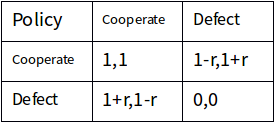
- 以字典（键值对）来构建该收益矩阵
- 由于r必须小于网络中节点的最大度数k_max，故可设r = 1/19

In [27]:
r = 1/19 #r<k_max

#收益矩阵
matrix_reward = {'C':{'C':(1,1),'D':(1-r,1+r)},#行向量(C,C)(C,D)
                 'D':{'C':(1+r,1-r),'D':(0,0)}#(D,C)(D,D)
                }

## 构建博弈网络结构体
- 该博弈网络实质上是一个无向图，可采取邻接矩阵或邻接表的方式构建
### 该结构体应包含：
- 节点个数 num_nodes
    - __注：默认节点从1号开始__
- 全部节点的列表 
- 边的个数
- 全部边的列表
- 整个博弈网络的收益，计算公式如下
\begin{equation}
    Reward_{TotalNet} = \sum_{i=0}^{num_{nodes}}  Reward(node_{i})
\end{equation}
### 该结构体包含的成员函数有：
- 结构体初始化函数 __init(self,num_nodes)__
- 整个网络节点初始化函数 __initialize_nodes(self)__
- 生成网络函数 __generate_game_net(self)__

In [28]:
class GameNet:
    """
       博弈网络结构体
       初始化时需传入网络中节点个数num_nodes
    """
    def initialize_nodes(self):
        """
            初始化网络中节点的状态（已传入的网络中节点总数，故self含有num_nodes属性）
        """
        for i in range(self.num_nodes):
            foo = Node()#生成一个节点
            self.nodes.append(foo)#将该节点添加至节点列表中
            #print("第",i+1,"个节点，他的初始状态为",foo.state)
            
            
    def __init__(self,num_nodes):
        #网络中节点个数
        self.num_nodes = num_nodes
        #储存网络中全部节点的列表,初始化为空
        self.nodes = list()
        #储存网络中的边的列表，初始化为空
        self.edges = list()
        #网络的总收益,初始化为0
        self.total_reward = 0
        #调用函数初始化网络中的节点
        self.initialize_nodes()
        
    def generate_game_net(self,adjacency_list):
        """
            adjacency_list : 邻接表，其中包含相邻节点构成的序对，用来表示二者之间有一条边
        """
        #将邻接表中的边序对传送给网络的全部边列表
        self.edges = adjacency_list
        #现在使用self.edges对self.nodes中的每个node节点进行neighbour初始化
        print("-------正在生成无向图--------")
        for i in range(len(self.edges)):
            """
                对边集合中每个元素进行遍历
            """
            now_node_is = self.edges[i][0] #当前访问节点
            adjacency_to = self.edges[i][1] #该节点邻接至某节点
            print("当前访问",now_node_is," 邻接至",adjacency_to)
            """
            self.nodes[now_node_is-1].neighbours.append(self.nodes[adjacency_to-1])
            self.nodes[now_node_is-1].neighbour_number+=1
            self.nodes[adjacency_to-1].neighbours.append(self.nodes[now_node_is-1])
            self.nodes[adjacency_to-1].neighbour_number+=1
            """
            #更新边序对中的每个节点的邻居节点标号列表
            self.nodes[now_node_is-1].neighbours.append(adjacency_to)
            self.nodes[now_node_is-1].neighbour_number+=1
            self.nodes[adjacency_to-1].neighbours.append(now_node_is)
            self.nodes[adjacency_to-1].neighbour_number+=1
        print("--------生成无向图完成-------")
    def calculate_reward_of_each_node(self):
        """
            根据雪堆博弈收益矩阵挨个计算每个节点的收益
        """
        #现将每个节点的总收益置零
        for i in range(self.num_nodes):
            self.nodes[i].total_reward = 0
        
        #更新每个节点的总收益
        for x,y in self.edges:#取出边集合中的每个元素的两个值，即当前应该当计算的两个节点的收益
            #print(x,y)
            #print(self.nodes[x-1].state,self.nodes[y-1].state)
            #根据matrix_reward更新其收益
                #更新当前序对的第一个节点
            self.nodes[x-1].total_reward+=matrix_reward[self.nodes[x-1].state][self.nodes[y-1].state][0]
                #更新当前序对的第二个节点
            self.nodes[y-1].total_reward+=matrix_reward[self.nodes[x-1].state][self.nodes[y-1].state][1]
        #有了每个节点的总收益，很方便就能计算出每个节点的平均收益(公式见第一个cell中)
        for i in range(self.num_nodes):
            #遍历该网络的每个节点
            self.nodes[i].average_reward = self.nodes[i].total_reward/self.nodes[i].neighbour_number
    
    def get_average_reward_of_node(self,i):
        """
            获取第i个节点的平均收益 (i从1开始)
            先将该节点总收益置零
            计算其总收益:遍历其邻居节点，使用收益矩阵计算
            计算平均收益：总收益/总邻居数
            该函数返回值为一个常数
        """
        i = i -1
        total_reward = 0
        for j in self.nodes[i].neighbours:
            #print(j)
            total_reward+=matrix_reward[self.nodes[i].state][self.nodes[j-1].state][0]
        average_reward = total_reward/self.nodes[i].neighbour_number
        return average_reward
    
    def change_state(self,i):
        """
            修改节点i的状态，C->D或D->C
            此处为了配合play_the_game运行，设i从0开始
        """
        if self.nodes[i].state == 'C':
            self.nodes[i].state = 'D'
        else: 
            self.nodes[i].state = 'C'
        
    def play_the_game(self):
        """
            让网络动起来，开始博弈：先更改每个节点的状态，若更改后其节点的收益增多，则不改回去，否则修改回原状态
            在程序中设置设置一个状态指示器，若某个节点状态被修改了，则置其为True，否则置为False
        """
        #状态指示器
        FLAG = False
        for i in range(self.num_nodes):
            #遍历所有节点，修改其状态
            ante_change_reward = self.get_average_reward_of_node(i+1)#注意标号
            self.change_state(i) #修改状态
            post_change_reward = self.get_average_reward_of_node(i+1)
            if post_change_reward <= ante_change_reward:
                #若更改当前节点状态后收益没有增加，则再次更改其状态使其变回原来状态,且不对状态指示器进行置True
                self.change_state(i)#改回去
            else:
                #若更改后收益增加，则指示器置True
                FLAG = True
        return FLAG  
    
    def calc_net_reward(self):
        """
            计算当前网络的总收益
        """
        self.total_reward = 0
        for node in self.nodes:
            self.total_reward+=node.total_reward
        return self.total_reward
    
    def print_net(self):
        """
            打印显示网络当前的状态
        """
        print("当前网络状态如下：")
        print("网络节点数:",self.num_nodes)
        for i in range(self.num_nodes):
            print("第",i+1,"个节点当前状态为",self.nodes[i].state,"他的当前平均收益为",
                  self.nodes[i].average_reward,"与它邻接的的节点列表为",self.nodes[i].neighbours)
        print("当前网络的收益为:",self.total_reward)

### 一个小例子验证当前网络构建没有问题

In [29]:
x = GameNet(num_nodes=3)
adjacency_list = [(1,2),(2,3),(1,3)]
x.generate_game_net(adjacency_list=adjacency_list)
for i in range(len(x.nodes)):
    print("当前是第",i+1,"节点","他的状态是",x.nodes[i].state)
    print("与他邻接的节点有",x.nodes[i].neighbour_number,"个")
    print("与他邻接的节点为",x.nodes[i].neighbours)
x.calculate_reward_of_each_node()
for i in range(x.num_nodes):
    print("第",i+1,"个节点的总收益是:")
    print(x.nodes[i].total_reward)
    print("其平均收益是:")
    print(x.nodes[i].average_reward)
    print("\n")

#x.nodes[0].neighbours[1]
#x.get_average_reward_of_node(3)
#x.play_the_game()
x.calc_net_reward()
x.print_net()

-------正在生成无向图--------
当前访问 1  邻接至 2
当前访问 2  邻接至 3
当前访问 1  邻接至 3
--------生成无向图完成-------
当前是第 1 节点 他的状态是 D
与他邻接的节点有 2 个
与他邻接的节点为 [2, 3]
当前是第 2 节点 他的状态是 D
与他邻接的节点有 2 个
与他邻接的节点为 [1, 3]
当前是第 3 节点 他的状态是 D
与他邻接的节点有 2 个
与他邻接的节点为 [2, 1]
第 1 个节点的总收益是:
0
其平均收益是:
0.0


第 2 个节点的总收益是:
0
其平均收益是:
0.0


第 3 个节点的总收益是:
0
其平均收益是:
0.0


当前网络状态如下：
网络节点数: 3
第 1 个节点当前状态为 D 他的当前平均收益为 0.0 与它邻接的的节点列表为 [2, 3]
第 2 个节点当前状态为 D 他的当前平均收益为 0.0 与它邻接的的节点列表为 [1, 3]
第 3 个节点当前状态为 D 他的当前平均收益为 0.0 与它邻接的的节点列表为 [2, 1]
当前网络的收益为: 0


## 测试特例：二十个节点串联

In [54]:
#一个由二十个节点串联后组成的特殊的无向图
adjacency_list = [(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,9),(9,10),(10,11),(11,12),
                 (12,13),(13,14),(14,15),(15,16),(16,17),(17,18),(18,19),(19,20),(20,1)]
#生成网络
net = GameNet(20)
net.generate_game_net(adjacency_list=adjacency_list)
#计算每个节点收益
net.calculate_reward_of_each_node()
net.calc_net_reward()#计算网络收益
net.print_net()#打印初始网络

#开始博弈
while net.play_the_game() == True:
    #博弈过程中每次更新网络中节点的收益
    net.calculate_reward_of_each_node()

print("\n\n------博弈结束-------")
#博弈结束
net.calc_net_reward()
net.print_net()

count1 = 0
count2 = 0
for node in net.nodes:
    if node.state == 'C':
        count1+=1
    else:
        count2+=1
print("状态为C的的节点个数:",count1,"状态为D的节点:",count2)

-------正在生成无向图--------
当前访问 1  邻接至 2
当前访问 2  邻接至 3
当前访问 3  邻接至 4
当前访问 4  邻接至 5
当前访问 5  邻接至 6
当前访问 6  邻接至 7
当前访问 7  邻接至 8
当前访问 8  邻接至 9
当前访问 9  邻接至 10
当前访问 10  邻接至 11
当前访问 11  邻接至 12
当前访问 12  邻接至 13
当前访问 13  邻接至 14
当前访问 14  邻接至 15
当前访问 15  邻接至 16
当前访问 16  邻接至 17
当前访问 17  邻接至 18
当前访问 18  邻接至 19
当前访问 19  邻接至 20
当前访问 20  邻接至 1
--------生成无向图完成-------
当前网络状态如下：
网络节点数: 20
第 1 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [2, 20]
第 2 个节点当前状态为 C 他的当前平均收益为 0.9473684210526316 与它邻接的的节点列表为 [1, 3]
第 3 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [2, 4]
第 4 个节点当前状态为 C 他的当前平均收益为 0.9736842105263158 与它邻接的的节点列表为 [3, 5]
第 5 个节点当前状态为 C 他的当前平均收益为 0.9736842105263158 与它邻接的的节点列表为 [4, 6]
第 6 个节点当前状态为 D 他的当前平均收益为 0.5263157894736842 与它邻接的的节点列表为 [5, 7]
第 7 个节点当前状态为 D 他的当前平均收益为 0.5263157894736842 与它邻接的的节点列表为 [6, 8]
第 8 个节点当前状态为 C 他的当前平均收益为 0.9473684210526316 与它邻接的的节点列表为 [7, 9]
第 9 个节点当前状态为 D 他的当前平均收益为 0.5263157894736842 与它邻接的的节点列表为 [8, 10]
第 10 个节点当前状态为 D 他的当前平均收益为 0.0 与它邻接的的节点列表为 [9, 11]
第 11 个节点当前状态为

## 测试特例
- 二十个节点
- 一个节点与其余十九个节点全连接
- 仅需一个节点就可以覆盖所有边，验证网络是否可以发现这个关键节点

In [57]:
adjacency_list = [(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),
                 (1,10),(1,11),(1,12),(1,13),(1,14),(1,15),(1,16),(1,17),(1,18),
                 (1,19),(1,20)]
#只需要节点1就可以覆盖整个图
#生成网络
net = GameNet(20)
net.generate_game_net(adjacency_list=adjacency_list)
#计算每个节点收益
net.calculate_reward_of_each_node()
net.calc_net_reward()#计算网络收益
net.print_net()#打印初始网络

#开始博弈
while net.play_the_game() == True:
    #博弈过程中每次更新网络中节点的收益
    net.calculate_reward_of_each_node()

print("\n\n------博弈结束-------")
#博弈结束
net.calc_net_reward()
net.print_net()

count1 = 0
count2 = 0
for node in net.nodes:
    if node.state == 'C':
        count1+=1
    else:
        count2+=1
print("状态为C的的节点个数:",count1,"状态为D的节点:",count2)

-------正在生成无向图--------
当前访问 1  邻接至 2
当前访问 1  邻接至 3
当前访问 1  邻接至 4
当前访问 1  邻接至 5
当前访问 1  邻接至 6
当前访问 1  邻接至 7
当前访问 1  邻接至 8
当前访问 1  邻接至 9
当前访问 1  邻接至 10
当前访问 1  邻接至 11
当前访问 1  邻接至 12
当前访问 1  邻接至 13
当前访问 1  邻接至 14
当前访问 1  邻接至 15
当前访问 1  邻接至 16
当前访问 1  邻接至 17
当前访问 1  邻接至 18
当前访问 1  邻接至 19
当前访问 1  邻接至 20
--------生成无向图完成-------
当前网络状态如下：
网络节点数: 20
第 1 个节点当前状态为 C 他的当前平均收益为 0.961218836565097 与它邻接的的节点列表为 [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
第 2 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [1]
第 3 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [1]
第 4 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [1]
第 5 个节点当前状态为 C 他的当前平均收益为 1.0 与它邻接的的节点列表为 [1]
第 6 个节点当前状态为 C 他的当前平均收益为 1.0 与它邻接的的节点列表为 [1]
第 7 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [1]
第 8 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [1]
第 9 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [1]
第 10 个节点当前状态为 D 他的当前平均收益为 1.0526315789473684 与它邻接的的节点列表为 [1]
第 11 个节点当前状态为 D 他的当前平均

## 测试人为构建的随机例子
- 随机构造的例子
- 神经网络的全连接形式比较复杂，就拿它来测试
    - 把节点分为5层，每层四个，层间不连接，每层之间全连接
    - 若算法有效，应当隔一层选中节点使其为‘C’，且一共有 4×2 = 8个节点为‘C‘，即第二层和第四层节点全部为’C‘

In [59]:
adjacency_list = [(1,5),(1,6),(1,7),(1,8),
                  (2,5),(2,6),(2,7),(2,8),
                  (3,5),(3,6),(3,7),(3,8),
                  (4,5),(4,6),(4,7),(4,8),
                  (5,9),(5,10),(5,11),(5,12),
                  (6,9),(6,10),(6,11),(6,12),
                  (7,9),(7,10),(7,11),(7,12),
                  (8,9),(8,10),(8,11),(8,12),
                  (9,13),(9,14),(9,15),(9,16),
                  (10,13),(10,14),(10,15),(10,16),
                  (11,13),(11,14),(11,15),(11,16),
                  (12,13),(12,14),(12,15),(12,16),
                  (13,17),(13,18),(13,19),(13,20),
                  (14,17),(14,18),(14,19),(14,20),
                  (15,17),(15,18),(15,19),(15,20),
                  (16,17),(16,18),(16,19),(16,20)]
#生成网络
net = GameNet(20)
net.generate_game_net(adjacency_list=adjacency_list)
#计算每个节点收益
net.calculate_reward_of_each_node()
net.calc_net_reward()#计算网络收益
net.print_net()#打印初始网络

#开始博弈
while net.play_the_game() == True:
    #博弈过程中每次更新网络中节点的收益
    net.calculate_reward_of_each_node()

print("\n\n------博弈结束-------")
#博弈结束
net.calc_net_reward()
net.print_net()

count1 = 0
count2 = 0
for node in net.nodes:
    if node.state == 'C':
        count1+=1
    else:
        count2+=1
print("状态为C的的节点个数:",count1,"状态为D的节点:",count2)

-------正在生成无向图--------
当前访问 1  邻接至 5
当前访问 1  邻接至 6
当前访问 1  邻接至 7
当前访问 1  邻接至 8
当前访问 2  邻接至 5
当前访问 2  邻接至 6
当前访问 2  邻接至 7
当前访问 2  邻接至 8
当前访问 3  邻接至 5
当前访问 3  邻接至 6
当前访问 3  邻接至 7
当前访问 3  邻接至 8
当前访问 4  邻接至 5
当前访问 4  邻接至 6
当前访问 4  邻接至 7
当前访问 4  邻接至 8
当前访问 5  邻接至 9
当前访问 5  邻接至 10
当前访问 5  邻接至 11
当前访问 5  邻接至 12
当前访问 6  邻接至 9
当前访问 6  邻接至 10
当前访问 6  邻接至 11
当前访问 6  邻接至 12
当前访问 7  邻接至 9
当前访问 7  邻接至 10
当前访问 7  邻接至 11
当前访问 7  邻接至 12
当前访问 8  邻接至 9
当前访问 8  邻接至 10
当前访问 8  邻接至 11
当前访问 8  邻接至 12
当前访问 9  邻接至 13
当前访问 9  邻接至 14
当前访问 9  邻接至 15
当前访问 9  邻接至 16
当前访问 10  邻接至 13
当前访问 10  邻接至 14
当前访问 10  邻接至 15
当前访问 10  邻接至 16
当前访问 11  邻接至 13
当前访问 11  邻接至 14
当前访问 11  邻接至 15
当前访问 11  邻接至 16
当前访问 12  邻接至 13
当前访问 12  邻接至 14
当前访问 12  邻接至 15
当前访问 12  邻接至 16
当前访问 13  邻接至 17
当前访问 13  邻接至 18
当前访问 13  邻接至 19
当前访问 13  邻接至 20
当前访问 14  邻接至 17
当前访问 14  邻接至 18
当前访问 14  邻接至 19
当前访问 14  邻接至 20
当前访问 15  邻接至 17
当前访问 15  邻接至 18
当前访问 15  邻接至 19
当前访问 15  邻接至 20
当前访问 16  邻接至 17
当前访问 16  邻接至 18
当前访问 16  邻接至 19
当前访问 16  邻接至 20
--------生

## 如上所示，验证了此算法的有效性